Saving precip_data.txt to precip_data (1).txt


<ipython-input-7-4710bd91c389>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  precip_data = pd.read_csv(file_name, delimiter='\t', encoding='latin1', error_bad_lines=False)


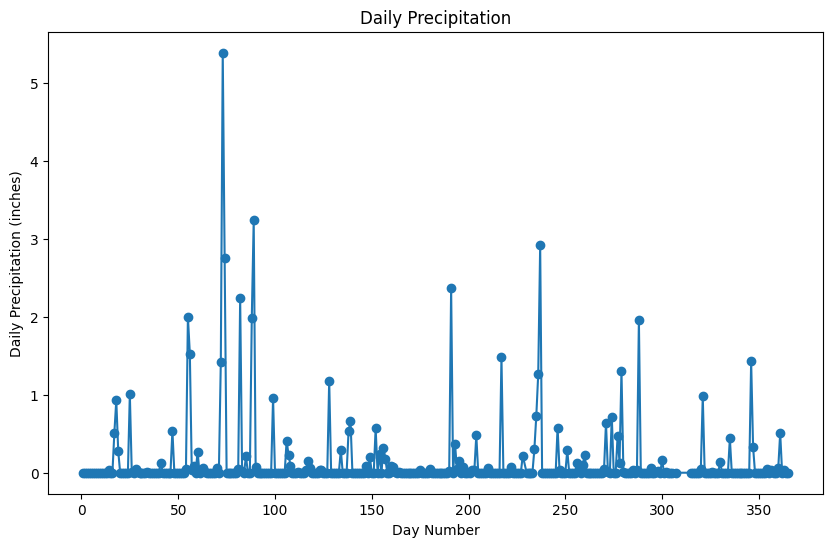

Max Daily Precipitation (inches): 5.39 on 2010-03-14 00:00:00
Max 24-hour Precipitation (inches): 2.37 on 2010-07-10 16:01:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import files

# Upload the 'precip_data.txt' file
uploaded = files.upload()

# Load the precipitation data with read_csv
file_name = list(uploaded.keys())[0]
precip_data = pd.read_csv(file_name, delimiter='\t', encoding='latin1', error_bad_lines=False)

# Convert date-time to datetime format
precip_data['Date_time'] = pd.to_datetime(precip_data['Date_time'], format='%m/%d/%Y %H:%M')

# Calculate DayNumber
precip_data['DayNumber'] = (precip_data['Date_time'] - pd.to_datetime("2010-01-01 00:00:00")).dt.days + 1

# Calculate maximum daily precipitation and corresponding date
max_daily_precipitation = precip_data.groupby('DayNumber')['P_inches'].sum().max()
max_daily_row = precip_data.groupby('DayNumber')['P_inches'].sum().idxmax()
max_daily_date = precip_data.loc[precip_data['DayNumber'] == max_daily_row, 'Date_time'].iloc[0]

# Calculate maximum 24-hour precipitation and corresponding date
precip_data['HourlyTotal'] = precip_data['P_inches'].rolling(window=24).sum()
max_24_hour_precipitation = precip_data['HourlyTotal'].max()
max_24_hour_row = precip_data['HourlyTotal'].idxmax()
max_24_hour_date = precip_data.loc[max_24_hour_row, 'Date_time']

# Plot the daily precipitation
plt.figure(figsize=(10, 6))
plt.plot(precip_data['DayNumber'].unique(), precip_data.groupby('DayNumber')['P_inches'].sum(), marker='o')
plt.xlabel('Day Number')
plt.ylabel('Daily Precipitation (inches)')
plt.title('Daily Precipitation')
plt.show()

# Print results
print(f"Max Daily Precipitation (inches): {max_daily_precipitation} on {max_daily_date}")
print(f"Max 24-hour Precipitation (inches): {max_24_hour_precipitation} on {max_24_hour_date}")

# Delete the uploaded file
os.unlink(file_name)
